361


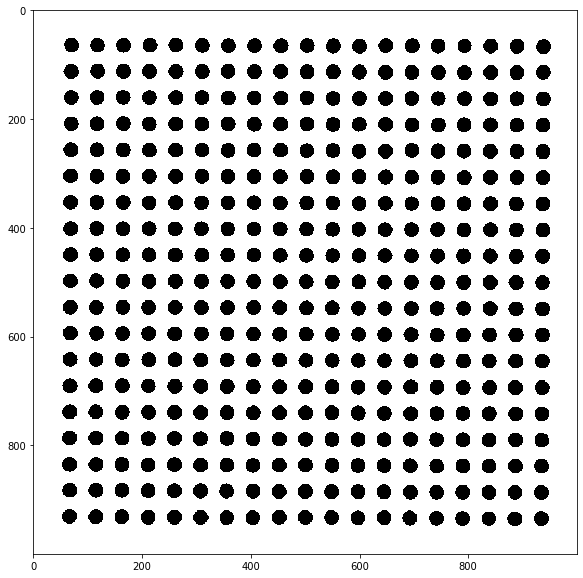

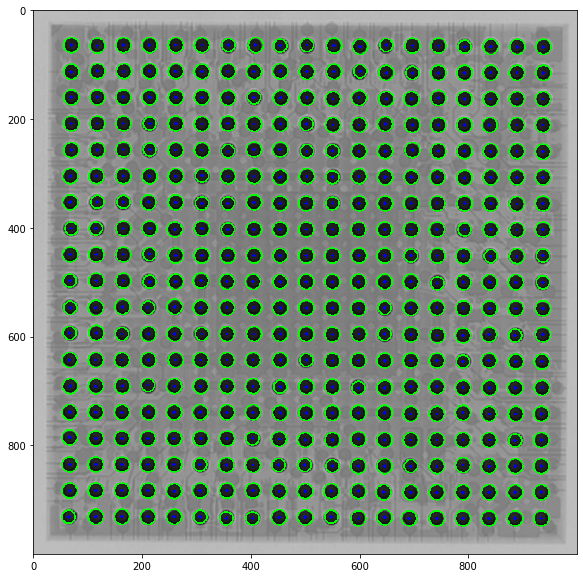

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("BGA01.tif")
img0 = (img)*10
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
img0 = cv2.GaussianBlur(img0,(5,5),5)
laplacian = cv2.Laplacian(img0,cv2.CV_64F)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 20, 200) 
ret,th1 = cv2.threshold(gray,90,255,cv2.THRESH_BINARY)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(th1,cmap = 'gray')
r = 15
for i in range(10):
    copy = img0.copy()
    detected_circles = cv2.HoughCircles(th1,  
                       cv2.HOUGH_GRADIENT, 1.5, 40, param1 = 100, 
                   param2 = 15, minRadius = r-2*(10-i), maxRadius = r+2*(10-i)) 
    
    radius = 0
    count = 0
    epsilon = r/10
    # Draw circles that are detected. 
    if detected_circles is not None: 

        # Convert the circle parameters a, b and r to integers. 
        detected_circles = np.around(detected_circles)

        for pt in detected_circles[0, :]: 
            a, b, r = pt[0], pt[1], pt[2]

            if a-r > -epsilon and a+r < copy.shape[0]+epsilon and b-r > -epsilon and b+r < copy.shape[1]+epsilon:
                cv2.circle(copy, (a, b), r, (0, 255, 0), 2) 
                cv2.circle(copy, (a, b), 1, (0, 0, 255), 3)
                count += 1
                radius += pt[2]
    r = int(radius/count)
    
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(copy,cmap = 'gray')
print(count)